# Machine Learning

#### Pump it Up: Data Mining the Water Table

#### Author: Bruno C. Mora Hernández
#### 08/04/2021

Can you predict which water pumps are faulty?

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

* Data available to download in : 

[Driven data: Pump it Up](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/) or in https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/

* Features or variables descriptions:

### Loading libraries and data

In [4]:
# Libraries loading

#!pip install xgboost (xgboost technique, execute this command in the anaconda Prompt to install)
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot  as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import nan as NA
import re
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize
from sklearn.impute import KNNImputer
import pickle

In [8]:
# We read the data  
train = pd.read_csv("Training.csv")
test = pd.read_csv("Test.csv")

The problem that we are facing is to predict the labels of the the pump, we need to train a model which should be able to predict the status of the water pumps. As you might be thinking, yes, this is a classification problem. With our model we classificate the data into class labels (three in this particular case), we can do this training a model with the data that driven-data offers us and testing the prediction capacity of our model introducing new data and comparing the results uploading our predictions to the website or just with the percentage of accuracy that our model drops out.


* Information about the data:

  SubmissionFormat.csv - The format for submitting your predictions

  Test.csv - The independent variables that need predictions

  Training_labels.csv - The dependent variable (status_group) for each of the rows in Training set values

  Training.csv - The independent variables for the training set
 
The Strategy I followed is to applicate the same preprocessing to both "train" and "test" datasets, we count with the labels for the training set, so the strategy is to use the "Training.csv" file to train our model and then testing the model prediction accuracy with the "Test.csv". Since we count with the labels we conclude that this is a "supervised learning" and that we can apply a classification model.

### Preprocessing

In [9]:
# Reading the test file
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [4]:
# Dimensions of test file
test.shape

(14850, 40)

In [5]:
# training file 
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
# Dimensions of the training file
train.shape

(59400, 40)

In [7]:
# Each row case (each water pump) has his own "id" number, we fix this "id" to future data operations  
train.set_index(["id"],inplace=True)

In [8]:
# Description of the train dataset
train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [9]:
# Name of all the "features" or variables
train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [10]:
# We check the data type of every single feature
train.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

### Finding the NAs, "lost values" or "missings"

In [11]:
# ¿How many NAs does our data set have?
train.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

It's is interesting to know that only categorical features have missing values, so we don't have to use data techniques to fill (impute) values in the numeric features. So what we are going to do is to substitute the NAs with a new category called "Desconocido".

In [12]:
# For higher comfort we split the variables in 2 groups
variables_categoricas = train.select_dtypes(include = "object")
variables_numericas = train.select_dtypes(include = "number")

To see a little better the distribution of the data, it would be good to show the data distribution histograms, it would also be a good time to review the data distribution of the variables with null values.

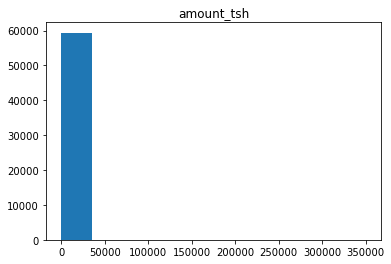

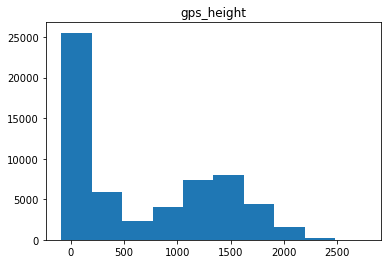

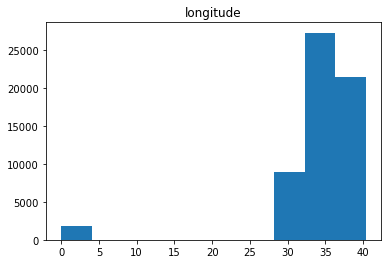

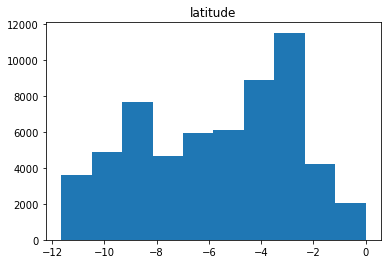

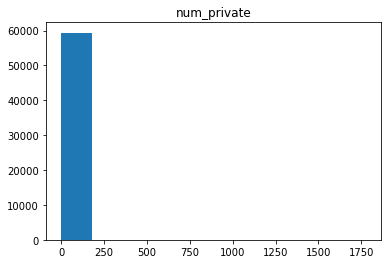

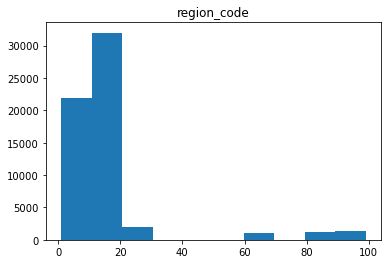

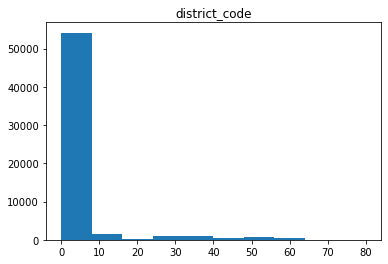

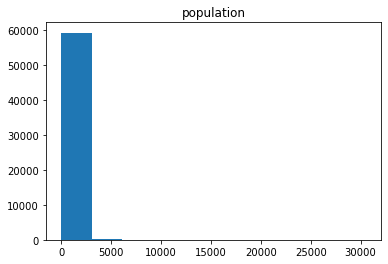

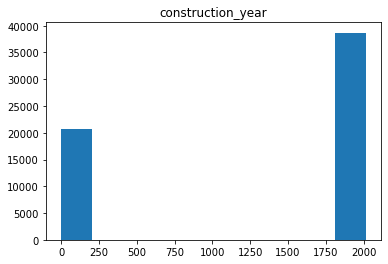

In [13]:
# Histogram (numeric features)
for l in variables_numericas:
    plt.hist(variables_numericas[l])
    plt.title(l)
    plt.show()

In [14]:
# Categorical features, all the categories inside and number of cases per category
for i in variables_categoricas:
    print("------------------------------", i, "-----------------------------------" )
    print(variables_categoricas[i].value_counts(ascending=False))

------------------------------ date_recorded -----------------------------------
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2012-01-25      1
2011-09-23      1
2011-09-21      1
2011-09-11      1
2011-09-12      1
Name: date_recorded, Length: 356, dtype: int64
------------------------------ funder -----------------------------------
Government Of Tanzania          9084
Danida                          3114
Hesawa                          2202
Rwssp                           1374
World Bank                      1349
                                ... 
Japan  Food Aid Counter Part       1
Watu Wa Marekani                   1
Kopwe Khalifa                      1
Vwcvc                              1
Gurdians                           1
Name: funder, Length: 1897, dtype: int64
------------------------------ installer -----------------------------------
DWE            17402
Government      1825
RWE             1206
Commu       

### Feature "funder"
We group the missing values in new category called "Desconocido"

In [15]:
# First form of filling the NAs
#df["funder"] = df.apply(lambda x:"Desconocido" if pd.isna(x["funder"]) else (x["funder"]), axis= 1)

In [16]:
# A second form, (easier)
train["funder"] = train["funder"].replace(np.nan, "Desconocido")

In [17]:
# We check that we don't have NA anymore "funder"
train["funder"].isnull().sum()

0

In [18]:
# Checking if "funder" has the new category "Desconocido"
train["funder"].value_counts(ascending = False).head(5)

Government Of Tanzania    9084
Desconocido               3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
Name: funder, dtype: int64

### Variable "installer"

In [19]:
# Filling NAs
train["installer"] = train["installer"].replace(np.nan, "Desconocido")

In [20]:
# Checking 
train["installer"].isnull().sum()

0

In [21]:
# Checking that "Desconocido" exists now
train["installer"].value_counts(ascending = False).head(5)

DWE            17402
Desconocido     3655
Government      1825
RWE             1206
Commu           1060
Name: installer, dtype: int64

### Variable "subvillage"

In [22]:
# filling 
train["subvillage"] = train["subvillage"].replace(np.nan, "Desconocido")

In [23]:
# Checking
train["subvillage"].isnull().sum()

0

In [24]:
# Checking
train["subvillage"].value_counts(ascending = False).head(5)

Madukani       508
Shuleni        506
Majengo        502
Kati           373
Desconocido    371
Name: subvillage, dtype: int64

### Variable "public_meeting"

In [25]:
# filling
train["public_meeting"] = train["public_meeting"].replace(np.nan, "Desconocido")

In [26]:
# checking
train["public_meeting"].isnull().sum()

0

In [27]:
# checking
train["public_meeting"].value_counts(ascending = False).head(3)

True           51011
False           5055
Desconocido     3334
Name: public_meeting, dtype: int64

### Variable "scheme_management"
Podríamos considerar meter dentro de la categoría "Other" los valores nulos y la categoría "None"

In [28]:
#filling
train["scheme_management"] = train["scheme_management"].replace([np.nan, "None", "Other"], "Other")

In [29]:
# checking
train["scheme_management"].isnull().sum()

0

In [30]:
# checking
train["scheme_management"].value_counts(ascending = False).head(15)

VWC                 36793
WUG                  5206
Other                4644
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
SWC                    97
Trust                  72
Name: scheme_management, dtype: int64

 ### Variable "scheme_name"
 Agrupamos los valores perdidos en la categoría "None", pero debido al elevadísmo número de valores perdidos sería una candidadat a salir del modelo

In [31]:
# Filling
train["scheme_name"] = train["scheme_name"].replace([np.nan, "None"], "None")

In [32]:
# Checking
train["scheme_name"].isnull().sum()

0

In [33]:
# Checking
train["scheme_name"].value_counts(ascending = False).head(10)

None                           28810
K                                682
Borehole                         546
Chalinze wate                    405
M                                400
DANIDA                           379
Government                       320
Ngana water supplied scheme      270
wanging'ombe water supply s      261
wanging'ombe supply scheme       234
Name: scheme_name, dtype: int64

### Variable "permit"
Los perdido los metemos en la cateoría desconocido, aunque quizá no serái mala idea meterlos en False

In [34]:
# Filling
train["permit"] = train["permit"].replace(np.nan, "Desconocido")

In [35]:
# Checking
train["permit"].isnull().sum()

0

In [36]:
# Checking
train["permit"].value_counts(ascending = False).head(10)

True           38852
False          17492
Desconocido     3056
Name: permit, dtype: int64

## Deleting features or/columns with unique values or non useful information 
We check the variability of the variables and if we think that is not adding information to our purpose, we delete it (reason specified)

In [37]:
# We check the variability of the variables
for i in train:
    print("------------------------------", i, "-----------------------------------" )
    print(train[i].value_counts(ascending=False))

------------------------------ amount_tsh -----------------------------------
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
250000.0        1
220.0           1
350000.0        1
138000.0        1
38000.0         1
Name: amount_tsh, Length: 98, dtype: int64
------------------------------ date_recorded -----------------------------------
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2012-01-25      1
2011-09-23      1
2011-09-21      1
2011-09-11      1
2011-09-12      1
Name: date_recorded, Length: 356, dtype: int64
------------------------------ funder -----------------------------------
Government Of Tanzania          9084
Desconocido                     3635
Danida                          3114
Hesawa                          2202
Rwssp                           1374
                                ... 
Japan  Food Aid Counter Part       1
Watu Wa Marekani      

In [38]:
# We delete the next features:

train.drop(columns = ["scheme_name"], inplace = True) # too many NAs

train.drop(columns = ["num_private"], inplace = True) # No description of this variable and weird values

train.drop(columns = ["recorded_by"], inplace = True) # Poor variability 

In [39]:
# Updating our two lists
variables_categoricas = train.select_dtypes(include = "object")
variables_numericas = train.select_dtypes(include = "number")

### Transformation of boolean variables into numeric variables

In [40]:
# Categorical features and cases per category
for i in variables_categoricas:
    print("------------------------------", i, "-----------------------------------" )
    print(variables_categoricas[i].value_counts(ascending=False))

------------------------------ date_recorded -----------------------------------
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2012-01-25      1
2011-09-23      1
2011-09-21      1
2011-09-11      1
2011-09-12      1
Name: date_recorded, Length: 356, dtype: int64
------------------------------ funder -----------------------------------
Government Of Tanzania          9084
Desconocido                     3635
Danida                          3114
Hesawa                          2202
Rwssp                           1374
                                ... 
Japan  Food Aid Counter Part       1
Watu Wa Marekani                   1
Kopwe Khalifa                      1
Vwcvc                              1
Gurdians                           1
Name: funder, Length: 1898, dtype: int64
------------------------------ installer -----------------------------------
DWE                    17402
Desconocido             3655
Government       

We check in the list if we have boolean variables and we transform them into numerical, substituting TRUE and FALSE with numbers

In [41]:
# variables categóricas binarias
variables_categ_bin =["public_meeting","permit"]
for j in variables_categ_bin:
    train[j] = [0 if x == False else 1 for x in train[j]] # 0 if FALSE/ 1 if TRUE

 ### Encoding categorical features, transforming categoricals to numeric

Now we transform all the categorical features with a technique called "LabalEncoder" which consists on transforming all our categories with numbers, this technique es specially useful for algorithms of machine learning.

In [42]:
# Transforming into numeric "date_recorded" but just taking the year, dropping the month and the day

year = train['date_recorded'].apply(lambda x: x[:4]).astype(int)
train["date_recorded"] = year

# We us LabelEncoder in all the categorical variables:

t2 = LabelEncoder()
funder_n = t2.fit_transform(train["funder"])
train["funder"] = funder_n


t3 = LabelEncoder()
installer_n = t3.fit_transform(train["installer"])
train["installer"] = installer_n

t4 = LabelEncoder()
wpt_name_n = t4.fit_transform(train["wpt_name"])
train["wpt_name"] = wpt_name_n

t5 = LabelEncoder()
basin_n = t5.fit_transform(train["basin"])
train["basin"] = basin_n

t6 = LabelEncoder()
subvillage_n = t6.fit_transform(train["subvillage"])
train["subvillage"] = subvillage_n

t7 = LabelEncoder()
region_n = t7.fit_transform(train["region"])
train["region"] = region_n

t8 = LabelEncoder()
lga_n = t8.fit_transform(train["lga"])
train["lga"] = lga_n

t9 = LabelEncoder()
ward_n = t9.fit_transform(train["ward"])
train["ward"] = ward_n


t11 = LabelEncoder()
scheme_management_n = t11.fit_transform(train["scheme_management"])
train["scheme_management"] = scheme_management_n

t12 = LabelEncoder()
extraction_type_n = t12.fit_transform(train["extraction_type"])
train["extraction_type"] = extraction_type_n

t13 = LabelEncoder()
extraction_type_group_n = t13.fit_transform(train["extraction_type_group"])
train["extraction_type_group"] = extraction_type_group_n

t14 = LabelEncoder()
extraction_type_class_n = t14.fit_transform(train["extraction_type_class"])
train["extraction_type_class"] = extraction_type_class_n

t15 = LabelEncoder()
management_n = t15.fit_transform(train["management"])
train["management"] = management_n

t16 = LabelEncoder()
management_group_n = t16.fit_transform(train["management_group"])
train["management_group"] = management_group_n

t17 = LabelEncoder()
payment_n = t7.fit_transform(train["payment"])
train["payment"] = payment_n

t18 = LabelEncoder()
payment_type_n = t18.fit_transform(train["payment_type"])
train["payment_type"] = payment_type_n

t19 = LabelEncoder()
water_quality_n = t19.fit_transform(train["water_quality"])
train["water_quality"] = water_quality_n

t20 = LabelEncoder()
quality_group_n = t19.fit_transform(train["quality_group"])
train["quality_group"] = quality_group_n

t21 = LabelEncoder()
quantity_n = t19.fit_transform(train["quantity"])
train["quantity"] = quantity_n

t22 = LabelEncoder()
quantity_group_n = t19.fit_transform(train["quantity_group"])
train["quantity_group"] = quantity_group_n

t23 = LabelEncoder()
source_n = t23.fit_transform(train["source"])
train["source"] = source_n

t24= LabelEncoder()
source_type_n = t24.fit_transform(train["source_type"])
train["source_type"] = source_type_n

t25 = LabelEncoder()
source_class_n = t25.fit_transform(train["source_class"])
train["source_class"] = source_class_n

t26 = LabelEncoder()
waterpoint_type_n = t26.fit_transform(train["waterpoint_type"])
train["waterpoint_type"] = waterpoint_type_n

t27 = LabelEncoder()
waterpoint_type_group_n = t27.fit_transform(train["waterpoint_type_group"])
train["waterpoint_type_group"] = waterpoint_type_group_n

In [43]:
# We check that all the variables are numeric
train.dtypes

amount_tsh               float64
date_recorded              int32
funder                     int32
gps_height                 int64
installer                  int32
longitude                float64
latitude                 float64
wpt_name                   int32
basin                      int32
subvillage                 int32
region                     int32
region_code                int64
district_code              int64
lga                        int32
ward                       int32
population                 int64
public_meeting             int64
scheme_management          int32
permit                     int64
construction_year          int64
extraction_type            int32
extraction_type_group      int32
extraction_type_class      int32
management                 int32
management_group           int32
payment                    int32
payment_type               int32
water_quality              int32
quality_group              int32
quantity                   int32
quantity_g

To verify that now all the variables are numerical we can graph all the variables in histograms and see their distribution, and perhaps we will also discover some more detail.

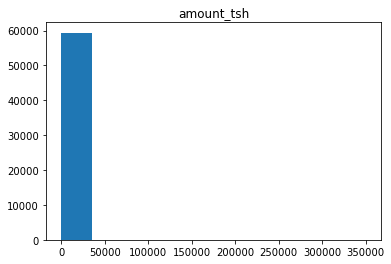

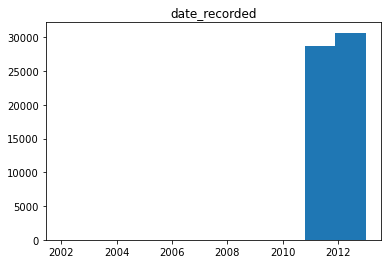

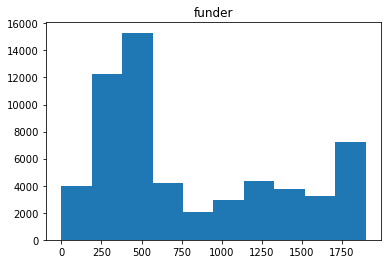

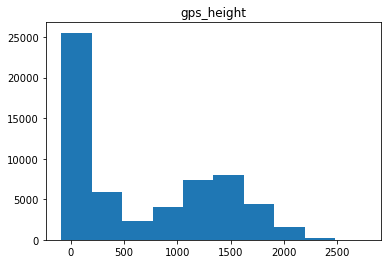

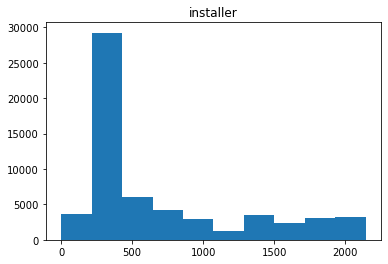

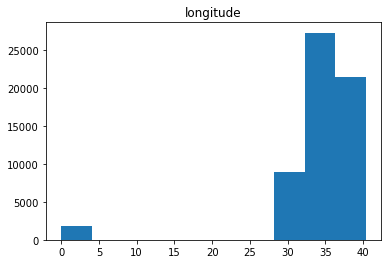

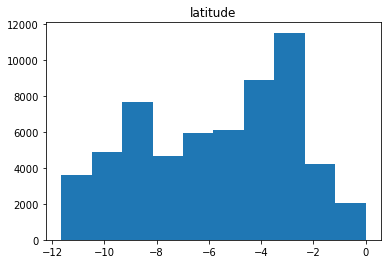

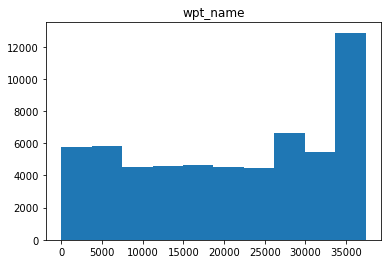

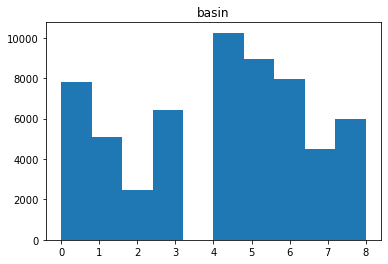

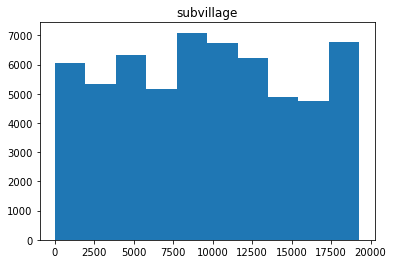

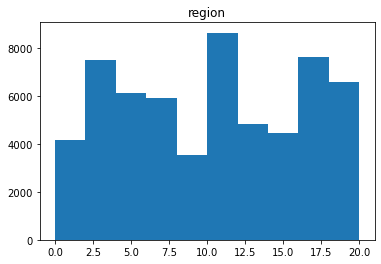

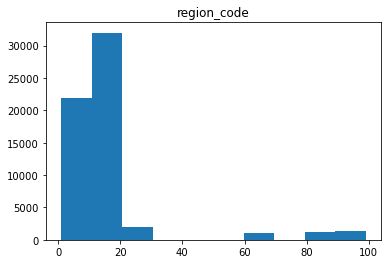

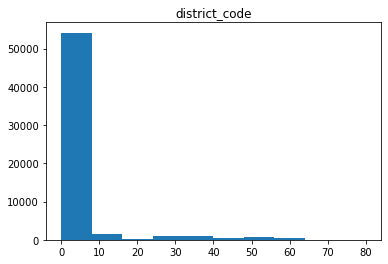

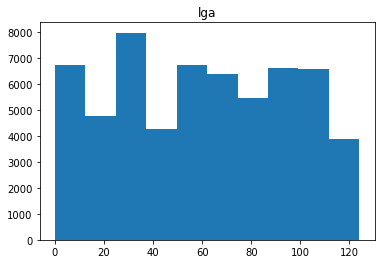

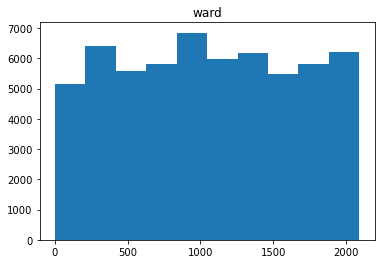

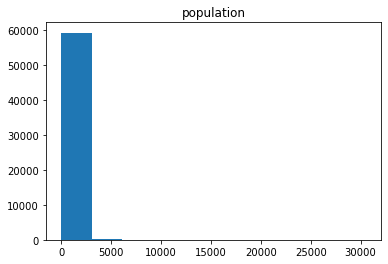

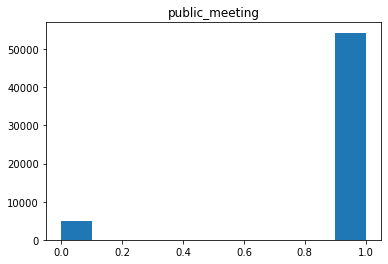

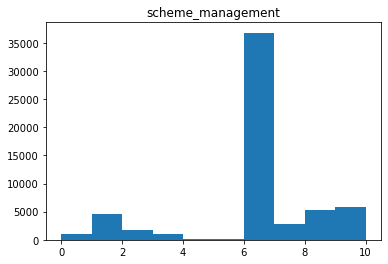

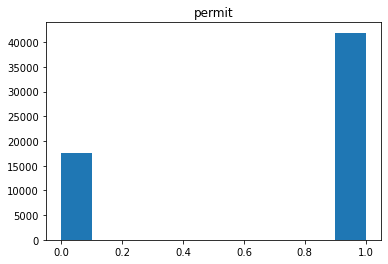

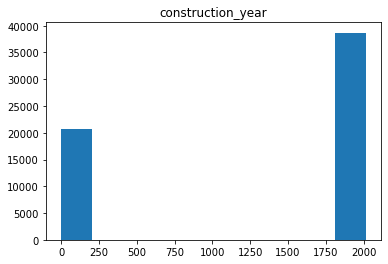

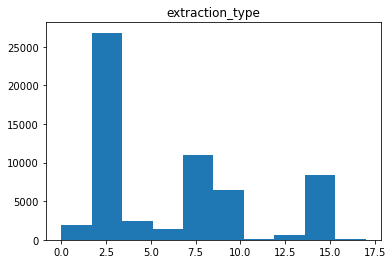

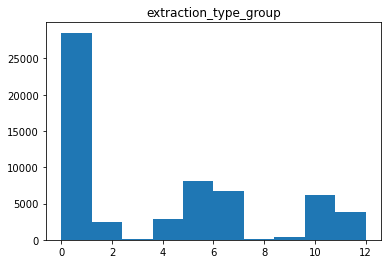

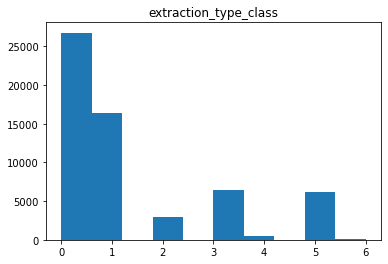

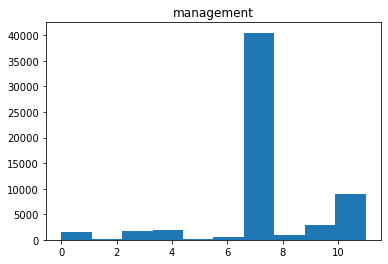

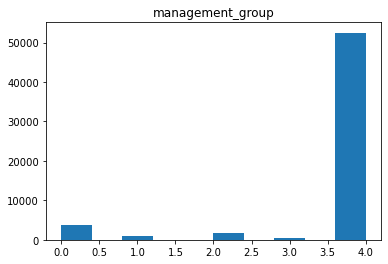

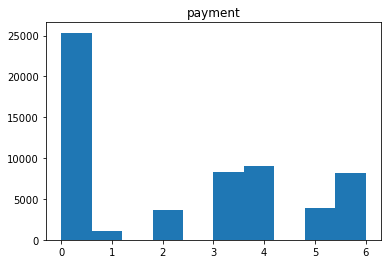

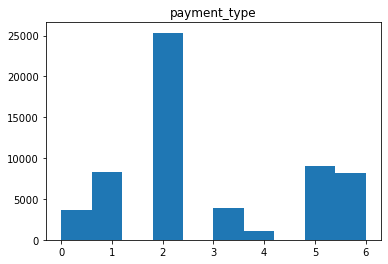

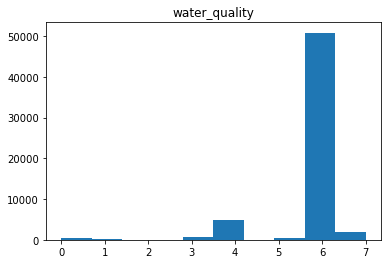

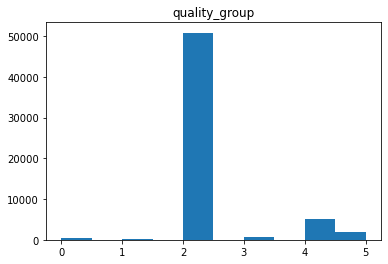

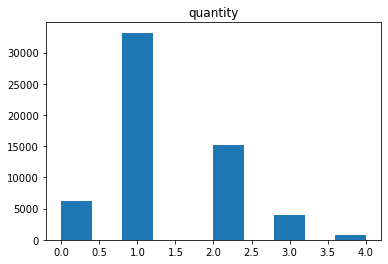

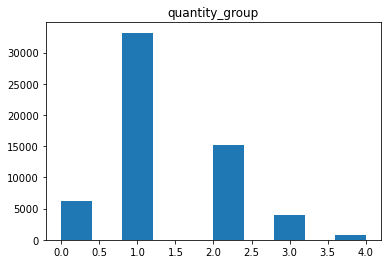

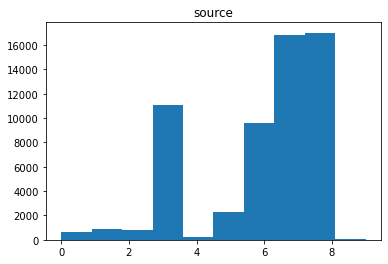

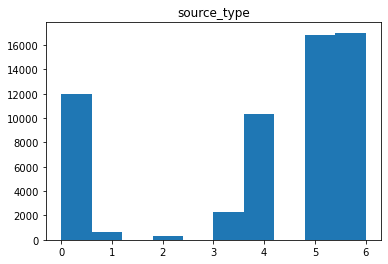

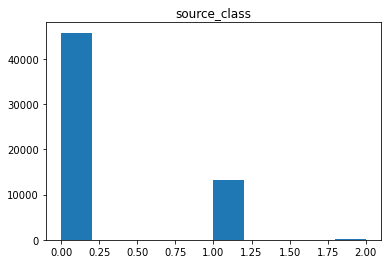

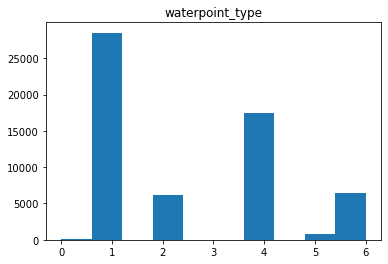

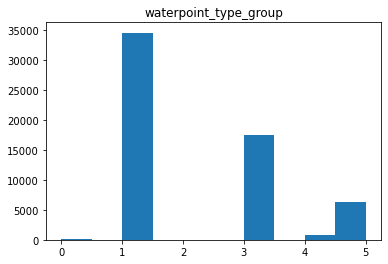

In [44]:
# Histogram with ALL the variables
for l in train:
    plt.hist(train[l])
    plt.title(l)
    plt.show()

In [46]:
# NAs verification
train.isnull().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
dtype: int64

In [47]:
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011,1370,1390,1519,34.938093,-9.856322,37399,1,11808,...,0,6,2,1,1,8,6,0,1,1
8776,0.0,2013,470,1399,546,34.698766,-2.147466,37195,4,15839,...,2,6,2,2,2,5,3,1,1,1
34310,25.0,2013,826,686,2049,37.460664,-3.821329,14572,5,9075,...,5,6,2,1,1,0,1,1,2,1
67743,0.0,2013,1742,263,1853,38.486161,-11.155298,37285,7,8983,...,2,6,2,0,0,3,0,0,2,1
19728,0.0,2011,20,0,119,31.130847,-1.825359,35529,4,7699,...,2,6,2,3,3,5,3,1,1,1


### Dealing with the multicollinearity

In [48]:
# Function to detect the multicolinearity between variables:

from sklearn.linear_model import LinearRegression


train_vif = train.copy(deep = True)
features = list(train_vif.columns)
train_vif = train_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = train_vif[fet]
    y = train[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable amount_tsh es: 1.0384672412053517
El valor del VIF para la variable date_recorded es: 1.6489025657532388
El valor del VIF para la variable funder es: 1.509494838474732
El valor del VIF para la variable gps_height es: 3.3258995246446723
El valor del VIF para la variable installer es: 1.4911736997291187
El valor del VIF para la variable longitude es: 1.624944700600627
El valor del VIF para la variable latitude es: 1.8036879456608896
El valor del VIF para la variable wpt_name es: 1.0546753795383628
El valor del VIF para la variable basin es: 1.6335304324846833
El valor del VIF para la variable subvillage es: 1.0285794736057874
El valor del VIF para la variable region es: 1.5771349852380971
El valor del VIF para la variable region_code es: 2.3858349795291307
El valor del VIF para la variable district_code es: 2.1444706649282015
El valor del VIF para la variable lga es: 1.3549982694036566
El valor del VIF para la variable ward es: 1.0323911717037342
El valo

<ipython-input-48-807d5a62ee3d>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-48-807d5a62ee3d>:20: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))


El valor del VIF para la variable quantity_group es: inf
El valor del VIF para la variable source es: 11.742828061262735
El valor del VIF para la variable source_type es: 11.170139942796519
El valor del VIF para la variable source_class es: 1.5251380960292231
El valor del VIF para la variable waterpoint_type es: 37.68705890282712
El valor del VIF para la variable waterpoint_type_group es: 35.27213399545989


In view of the fact that the RandomForest algorithm could obtain a better prediction if we leave some variables that a priori seem repeated and that increase collinearity, therefore we are not going to eliminate more variables for the moment.

In [49]:
# variables in our df
train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

### Preprocessing of the test dataset

We are going to repeat the same process with the test set, we are not going to eliminate the variables that came out with high collinearity, the rest of the preprocessing we are going to do the same as in the train set.

In [50]:
test["funder"] = test["funder"].replace(np.nan, "Desconocido")
test["installer"] = test["installer"].replace(np.nan, "Desconocido")
test["subvillage"] = test["subvillage"].replace(np.nan, "Desconocido")
test["public_meeting"] = test["public_meeting"].replace(np.nan, "Desconocido")
test["scheme_management"] = test["scheme_management"].replace([np.nan, "None", "Other"], "Other")
test["scheme_name"] = test["scheme_name"].replace([np.nan, "None"], "None")
test["permit"] = test["permit"].replace(np.nan, "Desconocido")

In [51]:
test.drop(columns = ["scheme_name"], inplace = True)
test.drop(columns = ["num_private"], inplace = True)
test.drop(columns = ["recorded_by"], inplace = True)

In [52]:
variables_categ_bin =["public_meeting","permit"]
for j in variables_categ_bin:
    test[j] = [0 if x == False else 1 for x in test[j]]

In [53]:

year = test['date_recorded'].apply(lambda x: x[:4]).astype(int)
test["date_recorded"] = year

t2 = LabelEncoder()
funder_n = t2.fit_transform(test["funder"])
test["funder"] = funder_n

t3 = LabelEncoder()
installer_n = t3.fit_transform(test["installer"])
test["installer"] = installer_n

t4 = LabelEncoder()
wpt_name_n = t4.fit_transform(test["wpt_name"])
test["wpt_name"] = wpt_name_n

t5 = LabelEncoder()
basin_n = t5.fit_transform(test["basin"])
test["basin"] = basin_n

t6 = LabelEncoder()
subvillage_n = t6.fit_transform(test["subvillage"])
test["subvillage"] = subvillage_n

t7 = LabelEncoder()
region_n = t7.fit_transform(test["region"])
test["region"] = region_n

t8 = LabelEncoder()
lga_n = t8.fit_transform(test["lga"])
test["lga"] = lga_n

t9 = LabelEncoder()
ward_n = t9.fit_transform(test["ward"])
test["ward"] = ward_n

t11 = LabelEncoder()
scheme_management_n = t11.fit_transform(test["scheme_management"])
test["scheme_management"] = scheme_management_n

t12 = LabelEncoder()
extraction_type_n = t12.fit_transform(test["extraction_type"])
test["extraction_type"] = extraction_type_n

t13 = LabelEncoder()
extraction_type_group_n = t13.fit_transform(test["extraction_type_group"])
test["extraction_type_group"] = extraction_type_group_n

t14 = LabelEncoder()
extraction_type_class_n = t14.fit_transform(test["extraction_type_class"])
test["extraction_type_class"] = extraction_type_class_n

t15 = LabelEncoder()
management_n = t15.fit_transform(test["management"])
test["management"] = management_n

t16 = LabelEncoder()
management_group_n = t16.fit_transform(test["management_group"])
test["management_group"] = management_group_n

t17 = LabelEncoder()
payment_n = t7.fit_transform(test["payment"])
test["payment"] = payment_n

t18 = LabelEncoder()
payment_type_n = t18.fit_transform(test["payment_type"])
test["payment_type"] = payment_type_n

t19 = LabelEncoder()
water_quality_n = t19.fit_transform(test["water_quality"])
test["water_quality"] = water_quality_n

t20 = LabelEncoder()
quality_group_n = t19.fit_transform(test["quality_group"])
test["quality_group"] = quality_group_n

t21 = LabelEncoder()
quantity_n = t19.fit_transform(test["quantity"])
test["quantity"] = quantity_n

t22 = LabelEncoder()
quantity_group_n = t19.fit_transform(test["quantity_group"])
test["quantity_group"] = quantity_group_n

t23 = LabelEncoder()
source_n = t23.fit_transform(test["source"])
test["source"] = source_n

t24= LabelEncoder()
source_type_n = t24.fit_transform(test["source_type"])
test["source_type"] = source_type_n

t25 = LabelEncoder()
source_class_n = t25.fit_transform(test["source_class"])
test["source_class"] = source_class_n

t26 = LabelEncoder()
waterpoint_type_n = t26.fit_transform(test["waterpoint_type"])
test["waterpoint_type"] = waterpoint_type_n

t27 = LabelEncoder()
waterpoint_type_group_n = t27.fit_transform(test["waterpoint_type_group"])
test["waterpoint_type_group"] = waterpoint_type_group_n

In [54]:
test.shape

(14850, 37)

In [55]:
# We also set the id of the test data set and check that it has the same dimensions as the train set
test.set_index(["id"],inplace=True)

In [56]:
train.shape

(59400, 36)

In [57]:
test.shape

(14850, 36)

### Stratified sampling, train-test sets

This time they have provided us with the training set and the validation set, the labels to predict have exactly the same number of data as the training set therefore, our model has to be trained only with the data from the train set, to subsequently predict the labels of the test set.

In [58]:
# reading the labels
labels = pd.read_csv("Training_labels.csv")
# Setting the "id" also in the labels
labels.set_index("id", inplace = True)

In [59]:
# Checking if the dimensions are the same number of cases we have in the "train" set
labels.shape

(59400, 1)

The most convenient way to work with models and avoid errors is to convert the labels into numeric variables

In [60]:
# labels are a categorical variable, it must be converted to numeric
labels.dtypes

status_group    object
dtype: object

In [61]:
# We convert the target to numeric with label encoder and substitute in the original variable
t28 = LabelEncoder()
status_group_n = t28.fit_transform(labels["status_group"])
labels["status_group"] = status_group_n

We are going to perform a training-test partition only taking two features or variables from the dataset, in order to make two-dimensional representations of some of the models that we are going to test, later we will perform the partition using all the variables of the dataset

In [62]:
# dataset train with just 2 features
train2 = train.iloc[:, 1:3]

In [63]:
# We do the stratified sampling with this 2-column dataset
X_train, X_test, y_train, y_test = train_test_split(
train2,
labels,
test_size=0.3,
random_state=42, 
stratify=labels)

We check that the proportions are okay

In [64]:
X_train.shape

(41580, 2)

In [65]:
X_test.shape

(17820, 2)

In [66]:
y_train.shape

(41580, 1)

In [67]:
y_test.shape

(17820, 1)

### Variable scaling

Many of the machine learning and optimization algorithms require variable scaling to obtain optimal performance.

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train2)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

 ## Classification techniques

### Algoritmo de Perceptron para clasificar

In [69]:
# Perceptron model 
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train_std, y_train.values.ravel())

Perceptron(eta0=0.1, random_state=42)

In [70]:
# Number of misclassified cases
y_pred = ppn.predict(X_test_std)
print("Misclassified examples: %d" % (y_test.values.ravel() !=y_pred).sum())

Misclassified examples: 8428


In [71]:
# Percentage of success in the classification
from sklearn.metrics import accuracy_score
print("Accuracy score: %.3f" % accuracy_score(y_test, y_pred))

Accuracy score: 0.527


As a result, we see that this algorithm does not work well to classify this data set, it is not capable of predicting the labels with a high percentage, it only does so with a probability of 52%, that is, almost half of the time this model is used. it would be confusing when making predictions. We can see it more graphically in the following graph:

In [72]:
# Function to graph the model in 2 dimensions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                         resolution=0.02):
    # setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors =("red", "blue", "lightgreen", "gray", "cyan")
    cmap= ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c= colors[idx],
                   marker=markers[idx], label= cl,
                   edgecolor="black")
    # highlight test examples
    if test_idx:
        #plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c="yellow", edgecolor="black", alpha=1.0,
                   linewidth=1, marker="o",
                   s=100, label="test set")

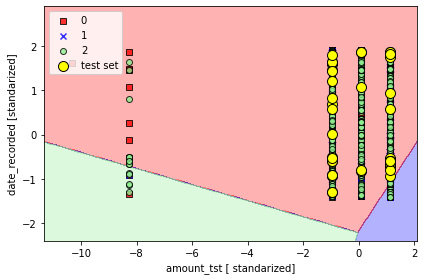

In [73]:
# plotting the model
X_combined_std =np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train.values.ravel(), y_test.values.ravel()))
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(1, 50))
plt.xlabel("amount_tst [ standarized]")
plt.ylabel("date_recorded [standarized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

The colors on the map represent the labels or the classes, and what the model does is classify each case of our dataset, for it to be considered a good model we should be able to appreciate a clearer transfer boundary that the model classifies the points well, here what we see is that most of the cases are classified in class 0 and there are even many cases of class 2 (green) that are classified in class 0. As a conclusion we can say that the perceptron algorithm does not work well in datasets that are not perfectly separable in a linear way as is the case with our data.

 ### Decison trees


We are going to use the decision tree as a classification method, remember that we are only using two of the features of the dataset "amount_tsh" and "date_recorded" due to the representation in a two-dimensional plane.

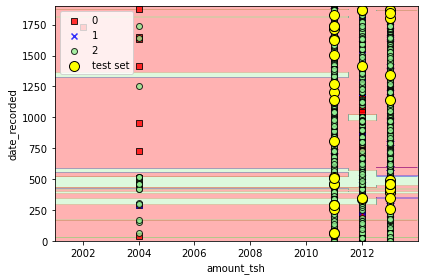

In [74]:
# Adjusting the model
tree_model = DecisionTreeClassifier(criterion = "gini", # Gini criterion
                                    max_depth=6, # Max depth of each tree
                                    random_state=42) # Seed
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train.values.ravel(), y_test.values.ravel()))
plot_decision_regions(X_combined,
                     y_combined,
                     classifier=tree_model,
                     test_idx=range(1,50))
plt.xlabel("amount_tsh")
plt.ylabel("date_recorded")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

y_pred = tree_model.predict(X_test)

In [75]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.589337822671156


It seems that our data have reacted well to the decision tree, we have improved the precision of the model with respect to the perceptron model to reach almost 60% using only two variables, also with a depth level of the trees of 6. Which suggests that the decision tree could be a good classification method for our data.

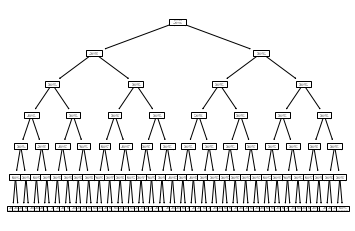

In [76]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

The next step would be to train our decision tree model with all the variables from the dataset and compare the results of the new tree with the tree that we have made previously. To do this, the first thing we have to do is perform the stratified sampling again, this time entering ALL the variables of the dataset

In [77]:
# We perform the training-test partitions on the train data set (our training set)
X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, 
                                                    test_size = 0.3,
                                                    random_state = 42, 
                                                    stratify = labels 

)

This time we will no longer be able to observe the behavior of the function in a plane because here we already have many variables

In [78]:
# Adjusting the model
tree_model = DecisionTreeClassifier(criterion = "gini", # Criterio de impureza de Gini
                                    max_depth=6, # Máximo de profundidad de cada árbol
                                    random_state=42) # Semilla
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

In [79]:
# Accuracy test
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


As we can see, the level of precision has improved a lot, this is very good news, because it means that applying a more powerful algorithm that combines multiple decision trees such as Random Forest, we could obtain very good results.


### Random Forest

In [80]:
forest = RandomForestClassifier( criterion = "entropy",
                                n_estimators = 300,
                                random_state = 42,
                                n_jobs = 2)
forest.fit(X_train, y_train.values.ravel())

# predictions
y_pred = forest.predict(X_test)


In [81]:
# Accuracy test
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8111111111111111


We obtain a precision values ​​of 81%, we will perform repeated cross validation to confirm these results

In [228]:
# cross validation
resultados = cross_val_score(estimator=forest, X=X_train, y=y_train.values.ravel(), cv=10)

In [229]:
print(resultados)

[0.8003848  0.8027898  0.80711881 0.80543531 0.81120731 0.81144781
 0.8047138  0.8027898  0.81505532 0.80687831]


In [230]:
# mean of that results
print(resultados.mean())

0.8067821067821068


In [231]:
# Variance 
print(resultados.std())

0.004345274326529782


## Ensemble models, classification with Boosting, AdaBoost y Bagging

### Boosting

In [87]:
%time
boost = XGBClassifier(use_label_encoder = False) # hiperparámetro use_label_encoder para solucionar problema con labels
boost.fit(X_train, y_train)
#Predicciones
y_pred = boost.predict(X_test)

Wall time: 0 ns
[12:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [88]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7991582491582492


boosting worsens results by 2%

### Adjusting AdaBoost

In [89]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion="entropy",
                             random_state=42,
                             max_depth=4)

ada = AdaBoostClassifier(base_estimator=tree,
                        n_estimators=500,
                        learning_rate=0.1,
                        random_state=42)

tree = tree.fit(X_train, y_train.values.ravel())
y_train_pred = tree.predict(X_train)
y_test_pred  = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print("Decision tree/test accuracies %.3f/%.3f"
        % (tree_train, tree_test))

ada = ada.fit(X_train, y_train.values.ravel())
y_train_pred = ada.predict(X_train)
y_test_pred =ada.predict(X_test)
ada_train =accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print("AdaBoost train/test accuracies %.3f/%.3f"
        % (ada_train, ada_test))

Decision tree/test accuracies 0.699/0.695
AdaBoost train/test accuracies 0.804/0.757


With this model, the decision tree works moderately, and there are not many differences between training tests, however with AdaBoost in train we obtain very good results but there are differences with respect to what is obtained in test.


### Adjusting the Bagging model

In [90]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(criterion="entropy",
                             random_state=42,
                             max_depth=4)

bag = BaggingClassifier(base_estimator=tree,
                       n_estimators = 500,
                       max_samples=1.0,
                       max_features=1.0,
                       bootstrap=True,
                       bootstrap_features=False,
                       n_jobs=1,
                       random_state=1)

tree = tree.fit(X_train, y_train.values.ravel())
y_train_pred = tree.predict(X_train)
y_test_pred  = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print("Decision tree/test accuracies %.3f/%.3f"
        % (tree_train, tree_test))

bag = bag.fit(X_train, y_train.values.ravel())
y_train_pred = bag.predict(X_train)
y_test_pred =bag.predict(X_test)
bag_train =accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print("Bagging train/test accuracies %.3f/%.3f"
        % (bag_train, bag_test))

Decision tree/test accuracies 0.699/0.695
Bagging train/test accuracies 0.697/0.696


With Bagging we have not been able to improve the results

### Model automation, hyperparameter tuning

As we have obtained the best results with RandomForest, this will be the classification method to which we are going to apply an optimization of the hyperparameters and later train our model with the best hyperparameters.

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
forest

RandomForestClassifier(n_jobs=2, random_state=42)

In [97]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [98]:
model_grid = GridSearchCV(estimator=forest,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=2)

In [100]:
model_grid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=2, random_state=42),
             n_jobs=2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 300, 500, 800, 1000]},
             scoring='accuracy')

In [101]:
print(model_grid.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 300}


In our best model, which has been RandomForest, we substitute these hyperparameters to obtain the best result.

In [102]:
print(model_grid.best_score_)

0.8067821067821068


### Building our predictions with our best model

Finally we will choose the RandomForest model to make our predictions

In [83]:
predictions = forest.predict(test)

In [84]:
# We save the id of our test dataset in a variable
indexes = test.index

In [88]:
# We create the df with a column that will contain the predictions contained by "y_pred_test"
df_submission = pd.DataFrame(predictions)
# We rename the column
df_submission = df_submission.rename(columns = {0: "status_group"})

In [89]:
# We already remove the labelencoder, we already substitute the integer values for their corresponding class of "status_group"
df_submission.status_group = df_submission.status_group.replace({ 0 : "functional", 2: "non functional", 1 : "functional needs repair"})

In [90]:
# we put a new column with the "id"
df_submission["id"] = indexes
# we set the "id" as index
df_submission = df_submission.set_index("id")

In [91]:
# We check the final result
df_submission.head()

,status_group
id,
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional


In [92]:
# We save the final dataframe with the predictions ready, with the submission format
df_submission.to_csv("SubmissionRF.csv") # Random Forest with a prediction of 81%